### Checkpoint dataset titanic passangers:

##### importation libraires

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns

In [26]:
#read dataset
df=pd.read_csv('titanic-passengers.csv', sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


#### partie :preprocessing

In [27]:
df.shape

(891, 12)

In [28]:
df.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [29]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
### Distribuation of target column 
df['Survived'].value_counts()

No     549
Yes    342
Name: Survived, dtype: int64

In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
#dropping missing values 
df.drop('PassengerId',axis=1, inplace= True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [33]:
df.drop('SibSp',axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,248740,13.0000,NaN,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,348123,7.6500,F G73,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,350050,7.8542,NaN,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,4,349909,21.0750,NaN,S
4,No,1,"Davidson, Mr. Thornton",male,31.0,0,F.C. 12750,52.0000,B71,S


In [34]:
df.drop('Parch', axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,248740,13.0000,NaN,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,348123,7.6500,F G73,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,350050,7.8542,NaN,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,349909,21.0750,NaN,S
4,No,1,"Davidson, Mr. Thornton",male,31.0,F.C. 12750,52.0000,B71,S


In [35]:
df.drop('Cabin',axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,248740,13.0000,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,348123,7.6500,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,350050,7.8542,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,349909,21.0750,S
4,No,1,"Davidson, Mr. Thornton",male,31.0,F.C. 12750,52.0000,S


In [36]:
df['Sex']=df['Sex'].map({'male':0 , 'female':1})
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",0,28.0,248740,13.0000,S
1,No,3,"Moen, Mr. Sigurd Hansen",0,25.0,348123,7.6500,S
2,No,3,"Jensen, Mr. Hans Peder",0,20.0,350050,7.8542,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,349909,21.0750,S
4,No,1,"Davidson, Mr. Thornton",0,31.0,F.C. 12750,52.0000,S


In [37]:
df['Survived']=df['Survived'].map({'No':0, 'Yes':1})
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",0,28.0,248740,13.0000,S
1,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,348123,7.6500,S
2,0,3,"Jensen, Mr. Hans Peder",0,20.0,350050,7.8542,S
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,349909,21.0750,S
4,0,1,"Davidson, Mr. Thornton",0,31.0,F.C. 12750,52.0000,S


In [38]:
df['Embarked']=df['Embarked'].map({'S':0, 'C':1 , 'Q':2})
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",0,28.0,248740,13.0000,0.0
1,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,348123,7.6500,0.0
2,0,3,"Jensen, Mr. Hans Peder",0,20.0,350050,7.8542,0.0
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,349909,21.0750,0.0
4,0,1,"Davidson, Mr. Thornton",0,31.0,F.C. 12750,52.0000,0.0


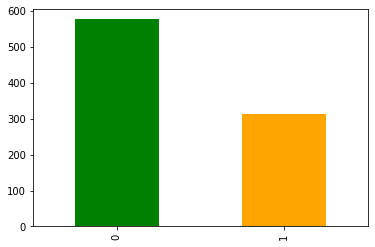

In [39]:
df.Sex.value_counts().plot(kind='bar',color=['green','orange'])

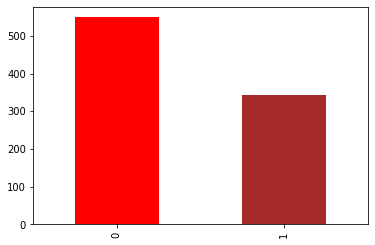

In [40]:
df.Survived.value_counts().plot(kind='bar',color=['red','brown'])

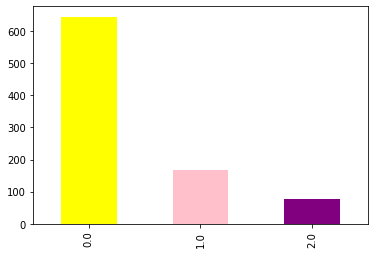

In [41]:
df.Embarked.value_counts().plot(kind='bar',color=['yellow','pink','purple'])

###### Visualization phase:

In [42]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

In [43]:
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",0,28.0,248740,13.0000,0.0
1,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,348123,7.6500,0.0
2,0,3,"Jensen, Mr. Hans Peder",0,20.0,350050,7.8542,0.0
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,349909,21.0750,0.0
4,0,1,"Davidson, Mr. Thornton",0,31.0,F.C. 12750,52.0000,0.0


In [44]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",0,28.0,248740,13.0000,0.0,Mr
1,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,348123,7.6500,0.0,Mr
2,0,3,"Jensen, Mr. Hans Peder",0,20.0,350050,7.8542,0.0,Mr
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,349909,21.0750,0.0,Mrs
4,0,1,"Davidson, Mr. Thornton",0,31.0,F.C. 12750,52.0000,0.0,Mr


In [45]:
df = df.drop(columns='Name')
df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title
0,0,2,0,28.0,248740,13.0000,0.0,Mr
1,0,3,0,25.0,348123,7.6500,0.0,Mr
2,0,3,0,20.0,350050,7.8542,0.0,Mr
3,0,3,1,29.0,349909,21.0750,0.0,Mrs
4,0,1,0,31.0,F.C. 12750,52.0000,0.0,Mr


In [59]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty"

                  "the Countess":  "Royalty",

                    "Dona":       "Royalty”,

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs

                    "Master" :    "Master"

                    }

SyntaxError: invalid syntax (<ipython-input-59-cc69a8a79a01>, line 21)

In [57]:
df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title
0,0,2,0,28.0,248740,13.0000,0.0,Mr
1,0,3,0,25.0,348123,7.6500,0.0,Mr
2,0,3,0,20.0,350050,7.8542,0.0,Mr
3,0,3,1,29.0,349909,21.0750,0.0,Mrs
4,0,1,0,31.0,F.C. 12750,52.0000,0.0,Mr
